In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
#load the dataset
df = pd.read_csv('WaterQualtiyPrediction_dataset.csv', sep = ';')
print(df.head())

   id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0  


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [131]:
df.shape

(2861, 11)

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [133]:
#Data Preprocessing
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [134]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
print(df.head())

   id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0  


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [136]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [137]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [138]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [139]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [140]:
#Feature Engineering
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

In [141]:
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [142]:
df.isnull().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

In [143]:
X = df[['id', 'year']]
y = df[pollutants]

In [144]:
#Model Training
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [146]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [147]:
#Model Evaluation
y_pred = model.predict(X_test)

In [148]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 22.21825046040189
   R2: -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2: 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2: -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2: 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2: 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2: 0.7357918194149974



In [149]:
# Section: Prediction on New Data
# You can modify 'year_input' to predict for any future year up to 2100

station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

# Show predictions with labels and units
print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f} mg/L")



Predicted pollutant levels for station '22' in 2024:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L


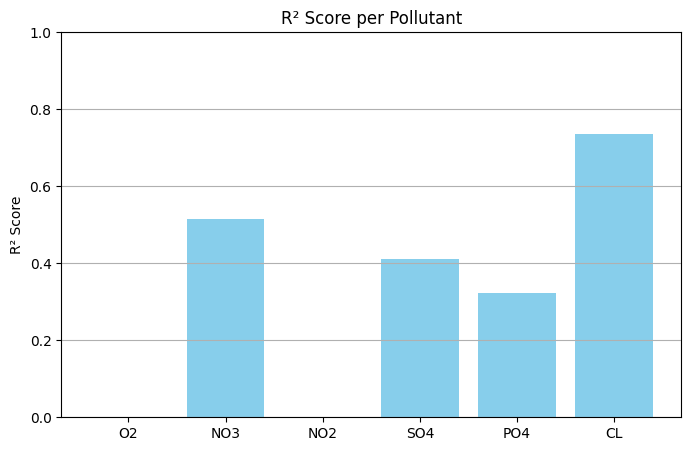

In [150]:
import matplotlib.pyplot as plt

r2_scores = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(pollutants))]
mse_scores = [mean_squared_error(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(pollutants))]

# Plot R² Scores
plt.figure(figsize=(8, 5))
plt.bar(pollutants, r2_scores, color='skyblue')
plt.title('R² Score per Pollutant')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

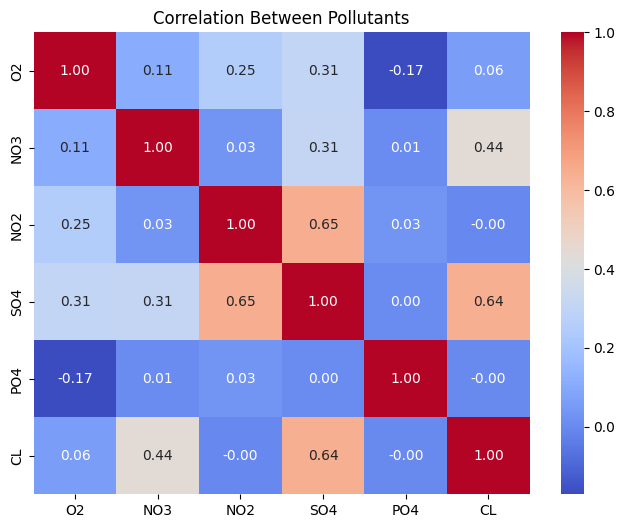

In [151]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.show()

In [152]:
# Predict pollutant levels for the selected year and the next 4 years
for future_year in range(year_input, year_input + 5):
    input_data = pd.DataFrame({'year': [future_year], 'id': [station_id]})
    input_encoded = pd.get_dummies(input_data, columns=['id'])

    # Ensure all required columns exist
    for col in X_encoded.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X_encoded.columns]

    # Make prediction
    predicted_pollutants = model.predict(input_encoded)[0]

    # Display results
    print(f"\nPredicted pollutant levels for station '{station_id}' in year {future_year}:")
    for p, val in zip(pollutants, predicted_pollutants):
        print(f"  {p}: {val:.2f} mg/L")



Predicted pollutant levels for station '22' in year 2024:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L

Predicted pollutant levels for station '22' in year 2025:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L

Predicted pollutant levels for station '22' in year 2026:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L

Predicted pollutant levels for station '22' in year 2027:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L

Predicted pollutant levels for station '22' in year 2028:
  O2: 12.60 mg/L
  NO3: 6.90 mg/L
  NO2: 0.13 mg/L
  SO4: 143.08 mg/L
  PO4: 0.50 mg/L
  CL: 67.33 mg/L


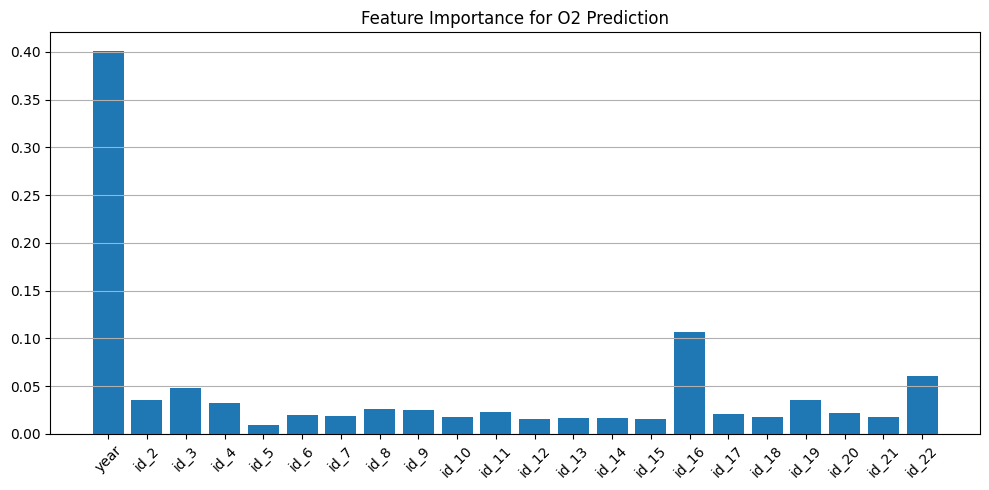

In [153]:
# For one regressor only
importances = model.estimators_[0].feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(X_encoded.columns, importances)
plt.title(f'Feature Importance for {pollutants[0]} Prediction')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [154]:
import joblib

# Save trained model and feature columns for Streamlit app deployment
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and column structure saved successfully!')

Model and column structure saved successfully!
